<a href="https://colab.research.google.com/github/PaoloBarba/NN_Homework_1/blob/main/NNDS_2023_Final_Homework.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Neural Networks for Data Science Applications
## End-of-term homework: Advanced transfer learning

**Name**: *Paolo Barba*

**Matricola**: *1885324*

> ✍ Upload the completed notebook **at least two days** before your expected exam's date on the Google Classroom page. For example, for the **January 12th** session, you should upload it by **January 9th, 23:59 Rome time**.

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
# To ensure reproducible results (as much as possible)
tf.keras.utils.set_random_seed(1234)

### Instructions

1. The homework is divided into two exercises. The first one (**10 points**) is mandatory for everyone. The second one (**5 points**) is mandatory only if you have not submitted the first homework or if you want to increase the mark.
2. If you score well on the project but poorly on the oral, the grade can be kept for the entire academic year (up to October 2024).

**IMPORTANT - read carefully before starting**:

> 🟨 *External material*: if you use any external material or inspiration for the code, reference it *explicitly* in the corresponding cell. For the textual descriptions, copy-paste *is not allowed*. <ins>Not following these two points is an immediate 0 mark</ins>.

> 🔵 *Grammar*: for the textual descriptions, I will remove points for too many grammatical or textual errors. Please try to be precise and provide nice-to-read descriptions, like if you were writing a report.

> 🟥 *Vectorization and TensorFlow*: the homework must be done _fully in TensorFlow_ and vectorizing the code as much as possible (e.g., do not loop explicitly over the batch dimension).

> 🟪 *Math*: you can also use LaTeX in Markdown if you need to write equations or if you need generic math notation.

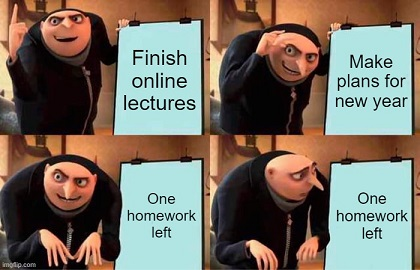

## Warmup: Data loading

**For this part, select an interesting dataset.**

*   This is similar to [Exercise 1 from the mid-term homework](https://colab.research.google.com/drive/1oDbshJeY62Id1O5pbsCrNFX9PdSY1ITP?usp=sharing), which you can check for completeness.
*   You should use a **different dataset** from the first homework, possibly of higher complexity.
*   Any data type (tabular, images, videos, audio, time-series, graphs, ...) is okay.

✍ **DESCRIPTION OF THE CODE**

*Provide a SHORT description of the dataset below (e.g., source, task, bibliographic reference if necessary...), both as text and in the comments of the code.*

**TODO**: add description here (1-2 paragraphs).

### Exercise 1: Advanced transfer learning (10 points)

For this exercise, you are asked to implement some form of "advanced" transfer learning method. These include, but are not limited to, the content of Lecture 10 in the course, e.g.:

1.   **Parameter-efficient fine-tuning** (PEFT) methods (LoRA, adapters, soft prompting, ...).
2.   **Task vectors** and arithmetic in the weight space.
3.   **Model merging** and model combination (e.g., relative representations).

The following are useful surveys and papers you can take inspiration from. If you are in doubt, ask me before starting.

1. [Scaling Down to Scale Up: A Guide to Parameter-Efficient Fine-Tuning](https://arxiv.org/abs/2303.15647) - A survey on PEFT models.
2. [Modular Deep Learning](https://arxiv.org/abs/2302.11529) - A tutorial on the emerging paradigm of modular deep learning, in which networks are composed of modular building blocks. This is connected to PEFT, see in particular Section 7.
3. Examples of model merging: [model ratatouille](https://arxiv.org/abs/2212.10445), [git re-basin](https://arxiv.org/abs/2209.04836), [Fisher averaging](https://arxiv.org/abs/2111.09832).
4. Examples of task arithmetic: [simple arithmetic](https://arxiv.org/abs/2212.04089), [tangent space](https://arxiv.org/abs/2305.12827).

For this exercise, you can either transfer from two models that you trained autonomously (e.g., train one model on another dataset, add an adapter, fine-tune on the dataset you selected before), or fine-tune directly from a pre-trained model found on the web. For finding pre-trained models, you can check [tf.keras.applications](https://www.tensorflow.org/api_docs/python/tf/keras/applications), [TensorFlow model garden](https://www.tensorflow.org/guide/model_garden?hl=it), or the [Hugging Face Hub](https://huggingface.co/docs/hub/index).

> 🟥 Remember that the homework must be done fully in TensorFlow, with no external libraries (when in doubt, ask).

✍ **DESCRIPTION OF THE CODE**

*Provide a description of what you are implementing, both as text and in the comments of the code.*

**TODO**: add description here (1-2 paragraphs).

In [ ]:
!pip install datasets

In [ ]:
# TODO: Your code here.
import pandas as pd
from datasets import load_dataset
from datasets import Dataset

#Load the dataset from the HuggingFace Hub
rd_ds = load_dataset("xiyuez/red-dot-design-award-product-description")

#Convert to pandas dataframe for convenient processing
rd_df = pd.DataFrame(rd_ds['train'])

#Combine the two attributes into an instruction string
rd_df['instruction'] = 'Create a detailed description for the following product: '+ rd_df['product']+', belonging to category: '+ rd_df['category']

rd_df = rd_df[['instruction', 'description']]

#Get a 5000 sample subset for fine-tuning purposes
rd_df_sample = rd_df.sample(n=5000, random_state=42)

#Define template and format data into the template for supervised fine-tuning
template = """Below is an instruction that describes a task. Write a response that appropriately completes the request.

### Instruction:

{}

### Response:\n"""

rd_df_sample['prompt'] = rd_df_sample["instruction"].apply(lambda x: template.format(x))
rd_df_sample.rename(columns={'description': 'response'}, inplace=True)
rd_df_sample['response'] = rd_df_sample['response'] + "\n### End"
rd_df_sample = rd_df_sample[['prompt', 'response']]

rd_df_sample['text'] = rd_df_sample["prompt"] + rd_df_sample["response"]
rd_df_sample.drop(columns=['prompt', 'response'], inplace=True)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:72: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


In [ ]:
rd_df_sample['text'][18952]

'Below is an instruction that describes a task. Write a response that appropriately completes the request.\n\n### Instruction:\n\nCreate a detailed description for the following product: CG8565, belonging to category: Desktop Computer\n\n### Response:\nThe CG8565 is a gaming PC offering space for high-quality equipment. The Windows 7 system works with an Intel Core i7 2600K processor and supports up to 32 GB of working memory. Two graphics cards, an SSD hard drive, an efficient water-cooling system and three chassis fans guarantee excellent performance. At the push of a button, the system can be overclocked by up to  35 per cent during continuous operation.\n### End'

In [4]:
!pip install data

  Preparing metadata (setup.py) ... done
  Created wheel for data: filename=data-0.4-py3-none-any.whl size=7227 sha256=68a6003e508b003df87afe180743c3644ec27f4daab1e6b73b542dff78bcf63c
  Stored in directory: /root/.cache/pip/wheels/d0/e8/fa/e253c256048ea58d99a8abb5e751abb6a838af6f12887b5418
Successfully built data


In [6]:

text_data_arr = [
    '''Mike: Hi Sarah, long time no see. How are you?
    Sarah: Hi Mike, I'm great. You?
    Mike: It's a beautiful day; couldn't be better.
    Sarah: Yeah, the weather is really nice today. Have you been up to anything interesting lately?
    Mike: Actually, I went on a hiking trip last weekend. It was amazing. I highly recommend it.
    Sarah: That sounds like a lot of fun. Where did you go?
    Mike: We went to the mountains up north. The scenery was breathtaking.
    Sarah: I'll have to plan a trip up there sometime. Thanks for the recommendation!
    Mike: No problem. So, how about you? What have you been up to?
    Sarah: Not too much, just been busy with work. But I'm hoping to take a vacation soon.
    Mike: That sounds like a good idea. Any ideas on where you want to go?
    Sarah: I'm thinking about going to the beach. I could use some time in the sun and sand.
    Mike: Sounds like a great plan. I hope you have a good time.
    Sarah: Thanks, Mike. It was good seeing you.
    Mike: Same here, Sarah. Take care!
    ''',
        '''Jack: Hey Emily! How's it going?
    Emily: Hey Jack! It's going pretty well. How about you?
    Jack: Not bad, thanks for asking. So, what have you been up to lately?
    Emily: Well, I recently started taking a painting class, which has been really fun. What about you?
    Jack: That's cool. I've been trying to get into running. It's been tough, but I'm starting to enjoy it.
    ...
    '''
]

In [10]:
!pip install tf-models-official

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 15.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.3/106.3 kB 15.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 33.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 6.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 241.2/241.2 kB 23.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 58.6 MB/s eta 0:00:00
  Created wheel for seqeval: filename=seqeval-1.2.2-py3-none-any.whl size=16162 sha256=c2824e3743426a1b87cbed24dbfd0f9f20eafb5c8924d4b3001b52127b4b63a4
  Stored in directory: /root/.cache/pip/wheels/1a/67/4a/ad4082dd7dfc30f2abfe4d80a2ed5926a506eb8a972b4767fa
Successfully built seqeval


In [11]:
import numpy as np
import tensorflow as tf

from tensorflow_models import nlp

In [12]:

# Build a small transformer network.
vocab_size = 100
network = nlp.networks.BertEncoder(
    vocab_size=vocab_size,
    # The number of TransformerEncoderBlock layers
    num_layers=3)

In [ ]:
tf.keras.utils.plot_model(network, show_shapes=True, expand_nested=True, dpi=48)


In [14]:
# Create a BERT pretrainer with the created network.
num_token_predictions = 8
bert_pretrainer = nlp.models.BertPretrainer(
    network, num_classes=2, num_token_predictions=num_token_predictions, output='predictions')

Instructions for updating:
Classification as a network is deprecated. Please use the layers.ClassificationHead instead.


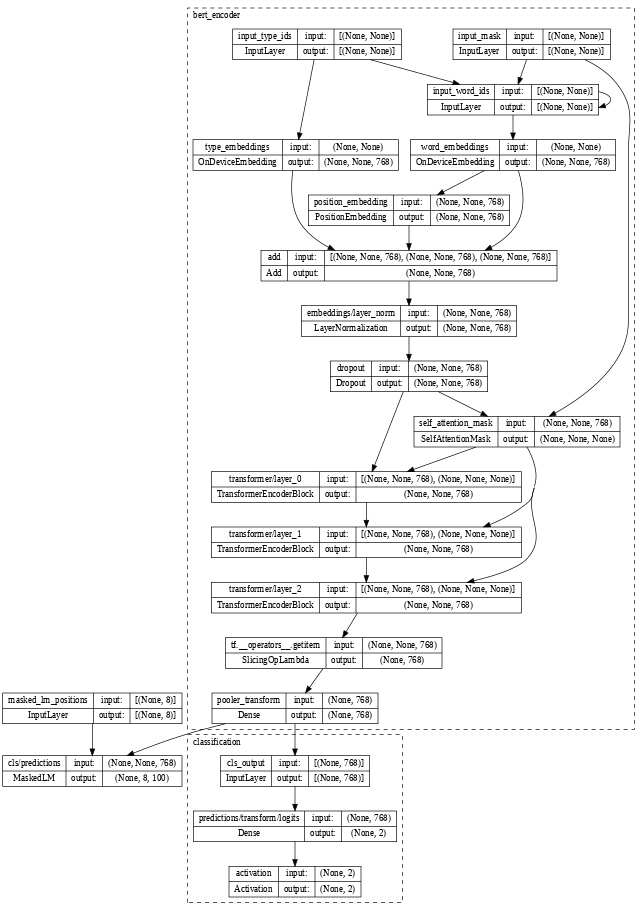

In [15]:
tf.keras.utils.plot_model(bert_pretrainer, show_shapes=True, expand_nested=True, dpi=48)


In [16]:
# We can feed some dummy data to get masked language model and sentence output.
sequence_length = 16
batch_size = 2

word_id_data = np.random.randint(vocab_size, size=(batch_size, sequence_length))
mask_data = np.random.randint(2, size=(batch_size, sequence_length))
type_id_data = np.random.randint(2, size=(batch_size, sequence_length))
masked_lm_positions_data = np.random.randint(2, size=(batch_size, num_token_predictions))

outputs = bert_pretrainer(
    [word_id_data, mask_data, type_id_data, masked_lm_positions_data])
lm_output = outputs["masked_lm"]
sentence_output = outputs["classification"]
print(f'lm_output: shape={lm_output.shape}, dtype={lm_output.dtype!r}')
print(f'sentence_output: shape={sentence_output.shape}, dtype={sentence_output.dtype!r}')

lm_output: shape=(2, 8, 100), dtype=tf.float32
sentence_output: shape=(2, 2), dtype=tf.float32


### Exercise 2: Interpreting the results (5 points)

**This exercise is required only for students that have not submitted the first homework, or for students who want to raise their mid-term mark (mark <= 8/10). For a mark of 8/10 or higher, an additional point can also be recovered during the exam.**

> **To recap**: if you submitted the mid-term homework, implement only Exercise 1, for a total of *10 points*. If you did not submit the mid-term homework, implement Exercises 1 and 2 for a total of *15 points*.

[LIME](https://arxiv.org/abs/1602.04938) (**Local Interpretable Model-agnostic Explanations**) is a very common explainability method, which trains a small interpretable model (e.g., a linear model) around a prediction $f(x)$ to interpret the prediction. For this exercise:

1. Read carefully the original LIME paper.
2. Re-implement the LIME algorithm and test it on 1 or 2 predictions given by your neural network (from Exercise 1).
3. This must be done fully in TensorFlow (same as the previous exercise).
4. LIME requires to select how to represent the inputs (e.g., patches of the original image). Explain your choice below.
5. Analyze the results you obtain.

In [ ]:
# TODO: Implement and test LIME.

### Final checklist

1. Carefully check all textual descriptions and the code. Insert comments when needed. <ins>Check for TODO to see if you missed anything.</ins>
2. Run everything one final time. *Please do not send me notebooks with errors or cells that are not working.*
3. Send the completed notebook following the instructions on top.

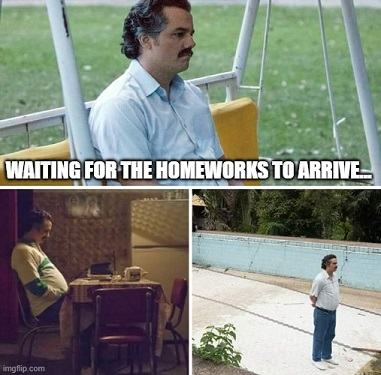